<a href="https://colab.research.google.com/github/priyanshu8493/Business_Review_Sentiment_Analysis/blob/main/restraunt_feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# extracting features and labels from the data

import csv

data_path = '/content/review.csv'

sentences = []
labels = []

rating_list = []


with open( data_path, 'r' ) as f:
  reader = csv.reader(f, delimiter = ',' )
  for row in reader :
    rating = row[3]
    review = row[2]

    try :

      rating = float(rating)

      sentences.append(review)

      if rating >=4:
        labels.append(1)
      else:
        labels.append(0)

    except ValueError:
      continue


In [4]:
#cleaning and preprocessing the sentences
from bs4 import BeautifulSoup
import string

table = str.maketrans('','', string.punctuation)

stopwords = []
corpass = []

with open ('/content/stopwords', 'r') as f:
  for line in f:
    stopwords.append(line.strip())

for i in sentences:
  i.replace(",", " , ")
  i.replace(".", " . ")
  i.replace("(", " ( ")
  i.replace(")", " ) ")
  i.replace(":", " : ")
  i.replace(";", " ; ")
  i.replace("!", " ! ")
  i.replace("?", " ? ")
  i.replace("/", " / ")

  soup = BeautifulSoup(i)
  i = soup.get_text()

  i = i.translate(table)

  words = i.strip().split()
  filtered_sentence = ''
  for word in words:
    if word not in stopwords:
      filtered_sentence = filtered_sentence + word + ' '
  corpass.append(filtered_sentence)

print(sentences[0])
print(corpass[0])



# corpass - cleaned list of sentences

<ipython-input-4-dbb652d543ed>:25: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(i)


The ambience was good, food was quite good . had Saturday lunch , which was cost effective .
Good place for a sate brunch. One can also chill with friends and or parents.
Waiter Soumen Das was really courteous and helpful.
The ambience good food quite good Saturday lunch cost effective Good place sate brunch One also chill friends parents Waiter Soumen Das really courteous helpful 


In [86]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

x = [len(y.split()) for y in corpass]
#print(max(x))

max_len = 598
vocab_size = 3000

tokenizer = Tokenizer(num_words = vocab_size, oov_token = "<OOV>" )
tokenizer.fit_on_texts(corpass)
word_index = tokenizer.word_index

sentence_sequences = tokenizer.texts_to_sequences(corpass)

padded_sequence = pad_sequences(sentence_sequences, maxlen = max_len, padding = 'post', truncating = 'post')

padded_sequence = np.array(padded_sequence)
labels = np.array(labels)


# padded_sequence - padded final seuquence

6994
good
6475
i
6423
food
5657
place
4942
the
3093
service
3033
chicken
2195
taste
2163
ordered
1991
ambience
OrderedDict([('good', 6994), ('i', 6475), ('food', 6423), ('place', 5657), ('the', 4942), ('service', 3093), ('chicken', 3033), ('taste', 2195), ('ordered', 2163), ('ambience', 1991), ('great', 1934), ('one', 1885), ('really', 1659), ('we', 1592), ('time', 1579), ('also', 1577), ('nice', 1464), ('like', 1448), ('best', 1430), ('biryani', 1296), ('staff', 1288), ('try', 1271), ('visit', 1252), ('restaurant', 1241), ('experience', 1162), ('order', 1152), ('well', 1130), ('veg', 1120), ('it', 1105), ('would', 1056), ('they', 986), ('amazing', 977), ('this', 968), ('must', 922), ('even', 863), ('us', 850), ('quality', 842), ('awesome', 838), ('starters', 835), ('served', 825), ('rice', 762), ('go', 747), ('overall', 736), ('went', 728), ('paneer', 702), ('friends', 698), ('menu', 693), ('tasty', 676), ('much', 670), ('quantity', 669), ('bad', 668), ('get', 667), ('tried', 655), ('

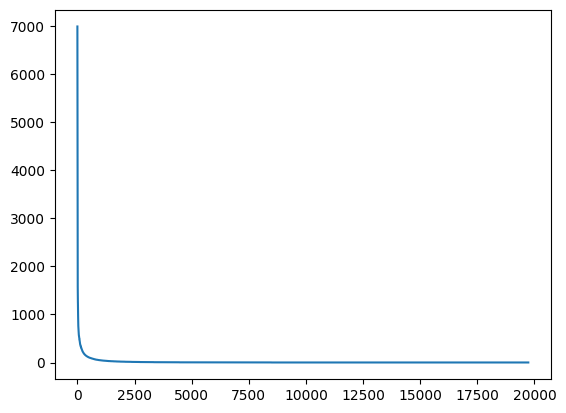

In [88]:
from collections import OrderedDict
import matplotlib.pyplot as plt

wc = tokenizer.word_counts

des_wc = OrderedDict(
    (sorted(wc.items(), key = lambda x : x[1] , reverse = True))
)

xs = []
ys = []
curr_x = 1

for i in des_wc:

  xs.append(curr_x)
  curr_x += 1
  ys.append(des_wc[i])

y=0
for i in des_wc:
  y+=1
  if y>10:
    break
  print(des_wc[i])
  print(i)

print(des_wc)



plt.plot(xs,ys)

plt.show()


In [89]:
#defining the model

import tensorflow as tf
embedding_dims = 16

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding( vocab_size, embedding_dims ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dims, return_sequences = True, dropout = 0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dims, dropout = 0.2, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dims, dropout = 0.2)),
    tf.keras.layers.Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(18, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.2)),
    tf.keras.layers.Dense(1,activation = 'sigmoid')

])
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)

model.compile ( loss = 'binary_crossentropy', optimizer = adam , metrics = ['accuracy'])


In [90]:
model.fit(padded_sequence, labels, epochs = 30)

Epoch 1/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.6188 - loss: 30.4414
Epoch 2/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.6278 - loss: 18.8239
Epoch 3/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - accuracy: 0.6269 - loss: 11.4989
Epoch 4/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.6294 - loss: 6.9085
Epoch 5/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.6318 - loss: 4.1216
Epoch 6/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.6323 - loss: 2.5074
Epoch 7/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - accuracy: 0.7121 - loss: 1.6050
Epoch 8/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - accuracy: 0.8119 - loss: 1.1189
Epoch 9/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.8596 - loss: 0.8617
Epoch 10/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.8631 - loss: 0.7321
Epoch 11/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.8099 - loss: 0.6913
Epoch 12/30
312/312 ━━━━━━

In [100]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

test_sentence = [
  "The service was painfully slow, and the food arrived cold. Not worth the hype."
]

test_sequence = tokenizer.texts_to_sequences(test_sentence)

test_padded_sequence = pad_sequences(test_sequence, maxlen = max_len, padding = 'post', truncating = 'post')

test= np.array(test_padded_sequence)

classification = model.predict(test)

print(classification)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[0.22941272]]
